# MMC - Laboratorium 5 - Bartosz Sosik (310287)

## Zadanie 6

### Wstęp
Model SIR (Susceptible-Infectious-Recovered) jest podstawowym modelem matematycznym używanym do opisywania rozprzestrzeniania się chorób zakaźnych w populacji. Opiera się on na podziale populacji na trzy grupy:

- Susceptible (S) - osoby podatne na zakażenie,
- Infectious (I) - osoby aktualnie zakażone, które mogą przekazywać chorobę innym,
- Recovered (R) - osoby, które wyzdrowiały i nabyły odporność na ponowne zakażenie lub zaszczepione

Początkowo największa grupa w populacji to oczywiście osoby podatne na zakażenie (S). Wybuch epidemii wymaga wprowadzenia do populacji pewnej liczby osob chorych (I). \
Za pomocą tego typu modeli możemy przewidywac dynamikę epidemii. Przebieg choroby w modelu SIR opisywany jest przez przynajmniej dwa parametry:
- $\beta$ - prawdopodobieństwo przekazania choroby w jednostce czasu osobnikom, które miały kontakt z zarażonym. $\beta = <0;1>$
- $\gamma$ - prawdopodobieństwo wyzdrowienia w jednostce czasu. Im większa tym szybciej następuje wyzdrowienie. $\gamma=<0;1>$

In [58]:
# Otwarcie plików i zapis do listy

def parse_files(chorzy_f, ozdrowiali_f, podatni_f):
    chorzy = []
    ozdrowiali = []
    podatni = []

    with open(chorzy_f) as f:
        for line in f:
            line.strip()
            temp = [int(item) for item in line.split()]
            chorzy.append(temp)

    with open(ozdrowiali_f) as f:
        for line in f:
            line.strip()
            temp = [int(item) for item in line.split()]
            ozdrowiali.append(temp)

    with open(podatni_f) as f:
        for line in f:
            line.strip()
            temp = [int(item) for item in line.split()]
            podatni.append(temp)
    return chorzy, ozdrowiali, podatni

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Rysowanie wykresów

def plot_results(chorzy, ozdrowiali, podatni):
    fig, axs = plt.subplots(3, 1, figsize=(8, 15))

    days = np.arange(0, len(chorzy[0]), 1)

    # Chorzy
    for sim in chorzy:
        axs[0].plot(days, sim, color='r')
    axs[0].set_title('Chorzy')
    axs[0].set_xlabel('Dzień')
    axs[0].set_ylim([min(min(row) for row in chorzy), max(max(row) for row in chorzy)])
    axs[0].set_xlim([0, max(days)])
    axs[0].set_ylabel('Liczba zarażonych')
    axs[0].grid(True)

    # Ozdrowiali
    for sim in ozdrowiali:
        axs[1].plot(days, sim, color='b')
    axs[1].set_title('Ozdrowiali')
    axs[1].set_xlabel('Dzień')
    axs[1].set_ylabel('Liczba ozdrowiałych')
    axs[1].set_ylim([min(min(row) for row in ozdrowiali), max(max(row) for row in ozdrowiali)])
    axs[1].set_xlim([0, max(days)])
    axs[1].grid(True)

    # Podatni
    for sim in podatni:
        axs[2].plot(days, sim, color='g')
    axs[2].set_title('Podatni')
    axs[2].set_xlabel('Dzień')
    axs[2].set_ylabel('Liczba podatnych na chorobę')
    axs[2].set_ylim([min(min(row) for row in podatni), max(max(row) for row in podatni)])
    axs[2].set_xlim([0, max(days)])
    axs[2].grid(True)

    fig.tight_layout()

In [92]:
def read_data(filename):
    with open(filename, 'r') as file:
        data = [line.strip().split() for line in file]
    return data

# Konwersja danych na współrzędne dla scatter plot
def get_coordinates(data):
    x_coords = []
    y_coords = []
    colors = []
    for y, row in enumerate(data):
        for x, value in enumerate(row):
            x_coords.append(x)
            y_coords.append(y)
            colors.append(int(value))
    return x_coords, y_coords, colors

# Wczytaj dane z pliku
def plot_map(file, title):
    filename = file
    data = read_data(filename)

    # Uzyskaj współrzędne punktów
    x_coords, y_coords, colors = get_coordinates(data)

    # Rysowanie wykresu
    plt.figure(figsize=(3, 3))
    scatter = plt.scatter(x_coords, y_coords, c=colors, cmap='viridis', marker='s')

    # Dodaj pasek kolorów
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Values')

    # Ustawienia osi
    plt.gca().invert_yaxis()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)

    # Wyświetlenie wykresu
plt.show()

### Wyniki symulacji dla domyślnych parametrów programu epidemia.cpp
- populacja = 100
- chorzy_dnia_zero = 10
- zaszczepieni_dnia_zero = 30
- $\beta$ = 0.5
- $\gamma$ = 0.25
- ile_eksperymentów = 3
- ile_dni = 10

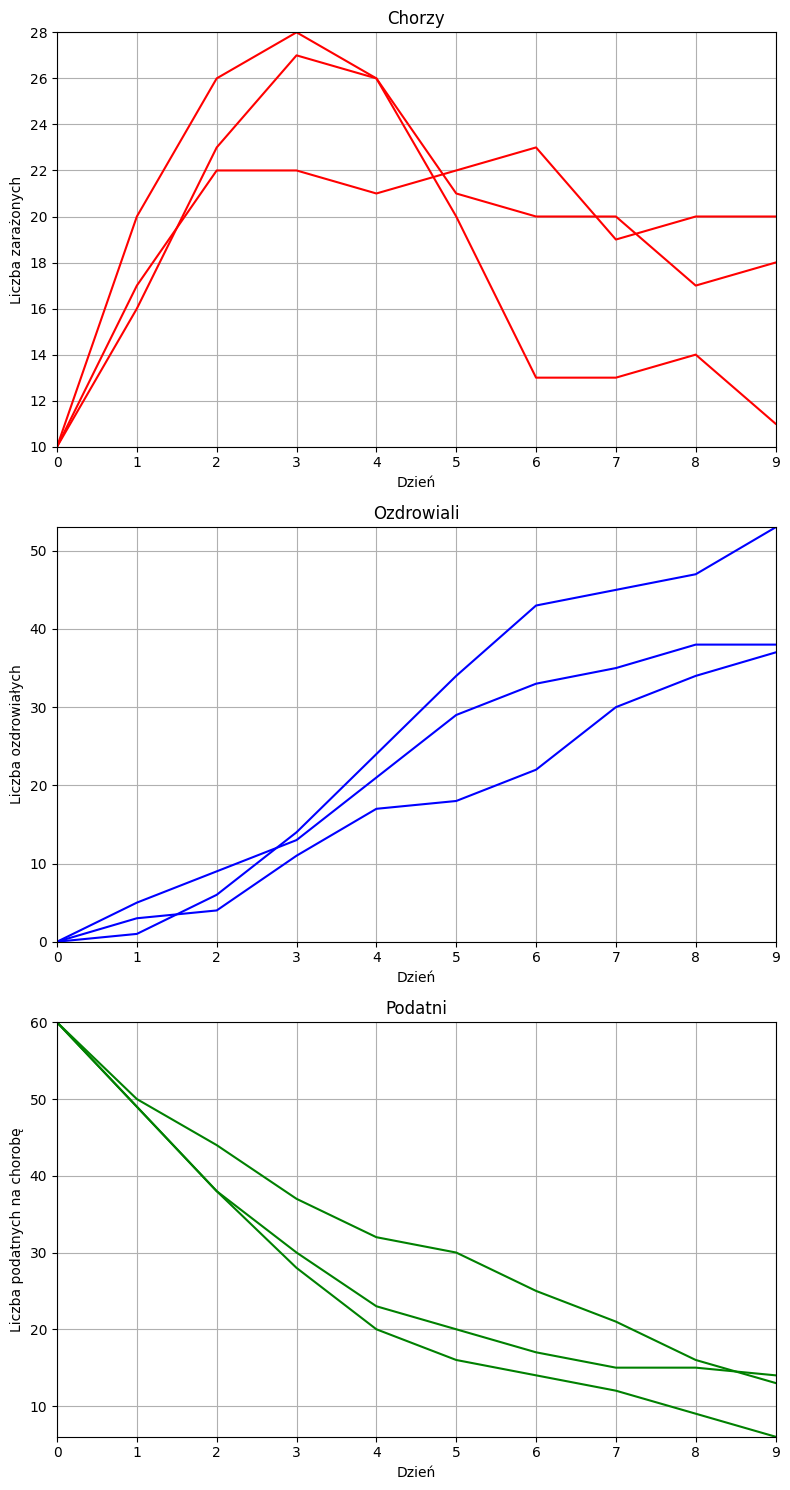

In [62]:
chorzy, ozdrowiali, podatni = parse_files('./init/chorzy_init.txt', './init/ozdrowiali_init.txt', './init/podatni_init.txt')
plot_results(chorzy, ozdrowiali, podatni)

### Zwiększone parametry symulacji
- populacja = 1000000
- chorzy_dnia_zero = 500
- zaszczepieni_dnia_zero = 50000
- $\beta$ = 0.5
- $\gamma$ = 0.25
- ile_eksperymentów = 20
- ile_dni = 120

Ustawiono znacznie większą liczebność populacji oraz stosunkowo małą liczbę chorych dnia zero, natomiast wydłużono ilość dni w symulacji.

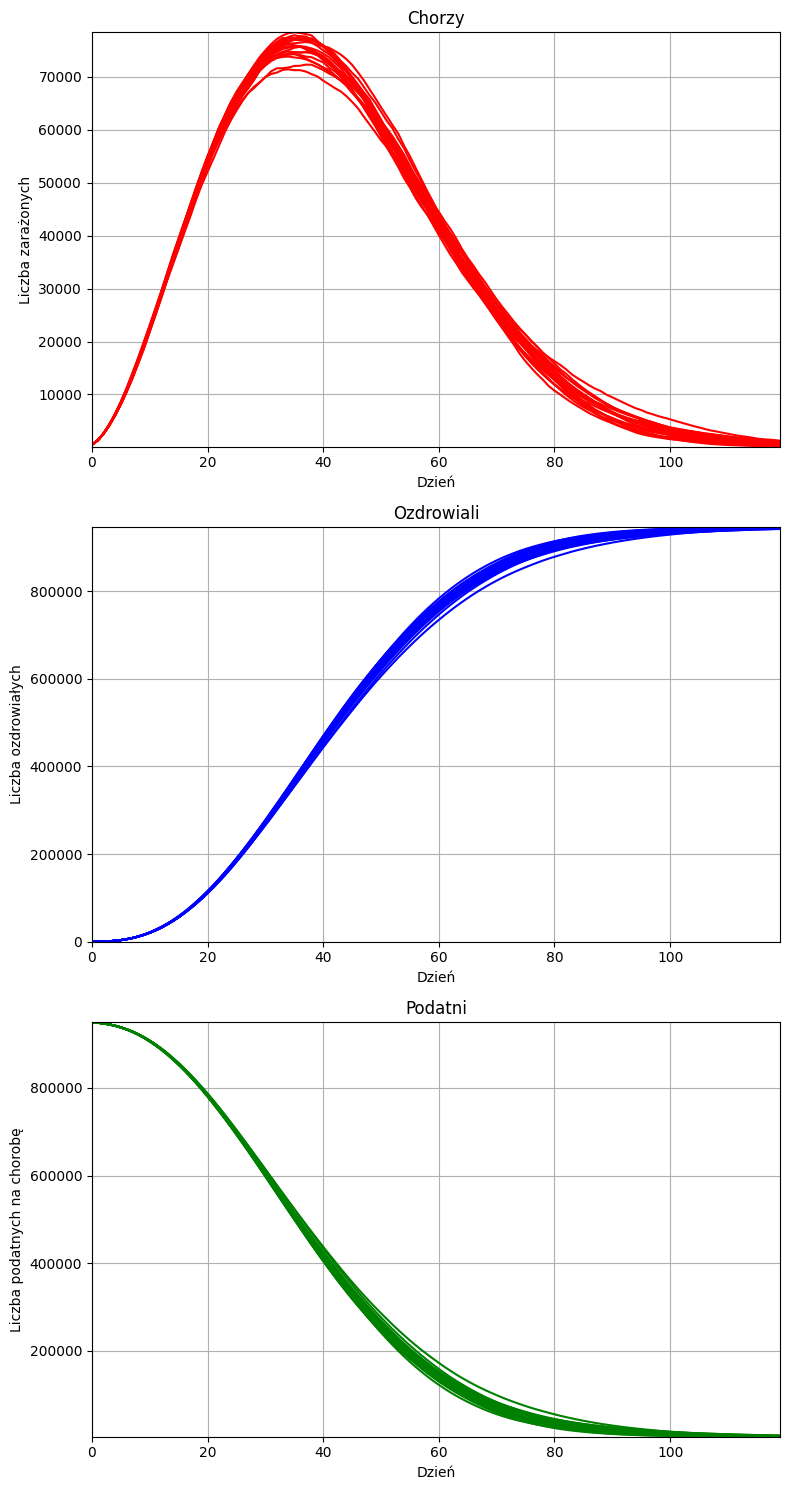

In [98]:
chorzy, ozdrowiali, podatni = parse_files('./e1/chorzy_kazdego_dnia.txt', './e1/ozdrowiali_kazdego_dnia.txt', './e1/podatni_kazdego_dnia.txt')
plot_results(chorzy, ozdrowiali, podatni)

Szczyt zarażeń padł wówczas w 38 dniu i wynosił 74975 osobników (około 7.5% populacji). Możemy zauważyć że eksperymenty różnią się między sobą, natomiast układają się w podobne rezultaty. Przedstawione poniżej mapy populacji dla kilku dni pandemii pokazują rozprzestrzenianie się chorby - zaszczepiony 0, ozdrowiały 1, podatny 2, chory 3.

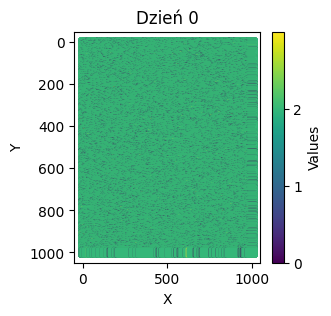

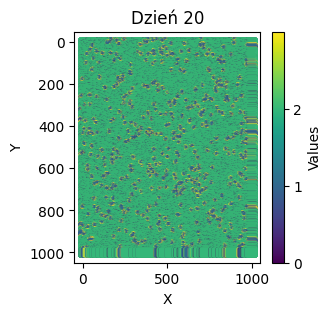

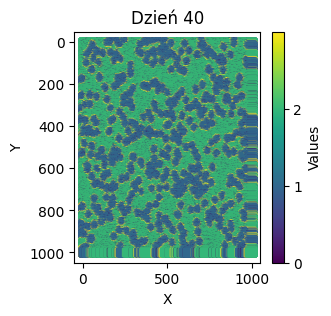

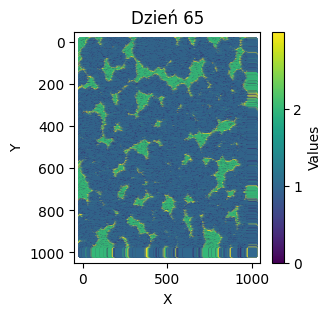

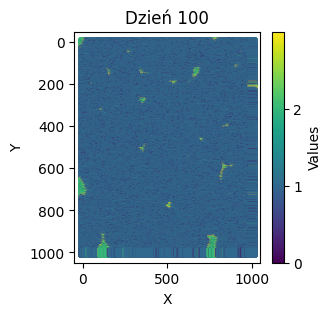

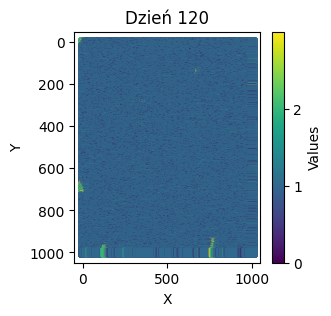

In [99]:
plot_map('./e1/mapa1.txt', "Dzień 0")
plot_map('./e1/mapa2.txt', "Dzień 20")
plot_map('./e1/mapa3.txt', "Dzień 40")
plot_map('./e1/mapa4.txt', "Dzień 65")
plot_map('./e1/mapa5.txt', "Dzień 100")
plot_map('./e1/mapa6.txt', "Dzień 120")

## Zmiana $\beta$
W tym podpunkcie zmieniono kod programu *epidemia.cpp* tak, by po wykryciu spadku liczby zachorowań zwiększyć prawdopodobieństwo transmisji choroby - $\beta$. Początkowo, ustalono następujące parametry tak, by chorym nieco więcej czasu zajęło wyzdrowienie - spora $\gamma$:
- populacja = 90000
- chorzy_dnia_zero = 70
- zaszczepieni_dnia_zero = 30
- $\beta$ = 0.35
- $\gamma$ = 0.1
- ile_eksperymentów = 20
- ile_dni = 120

Poniżej wyniki bez zmiany $\beta$:

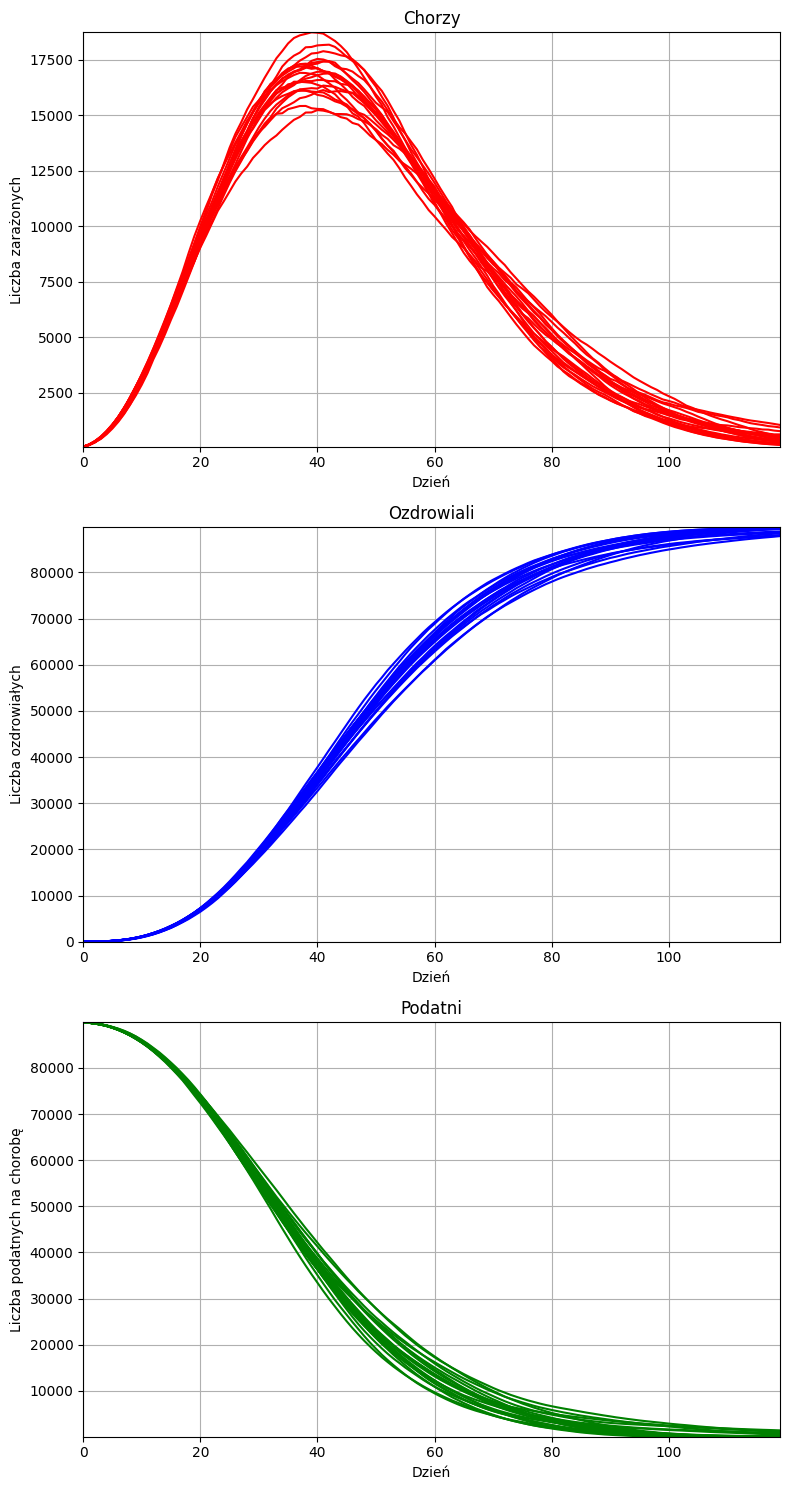

In [77]:
chorzy, ozdrowiali, podatni = parse_files('./e5/chorzy_kazdego_dnia.txt', './e5/ozdrowiali_kazdego_dnia.txt', './e5/podatni_kazdego_dnia.txt')
plot_results(chorzy, ozdrowiali, podatni)

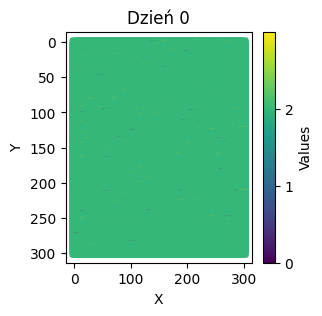

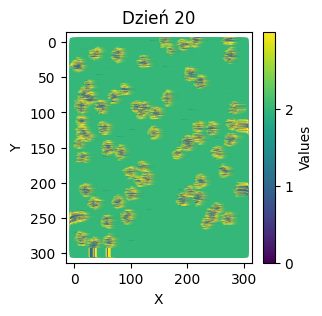

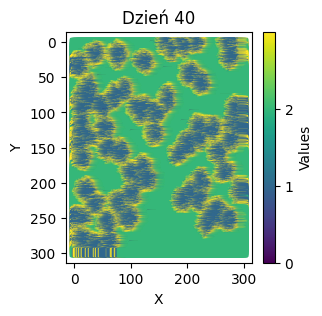

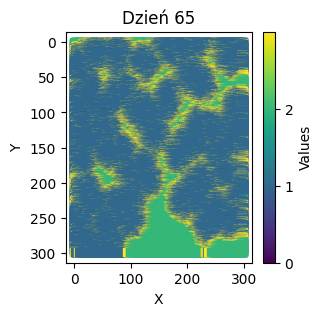

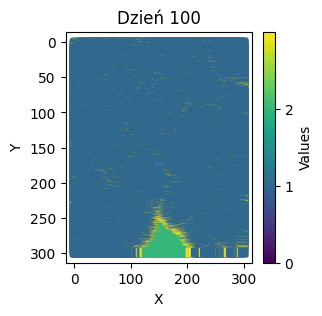

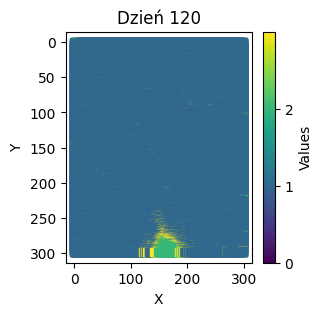

In [93]:
plot_map('./e5/mapa1.txt', "Dzień 0")
plot_map('./e5/mapa2.txt', "Dzień 20")
plot_map('./e5/mapa3.txt', "Dzień 40")
plot_map('./e5/mapa4.txt', "Dzień 65")
plot_map('./e5/mapa5.txt', "Dzień 100")
plot_map('./e5/mapa6.txt', "Dzień 120")

$\beta$ zmieniono na wartość 0.9 w momencie, gdy po szczycie zachorowań, ilość osób zarażonych spadła do 10000. 

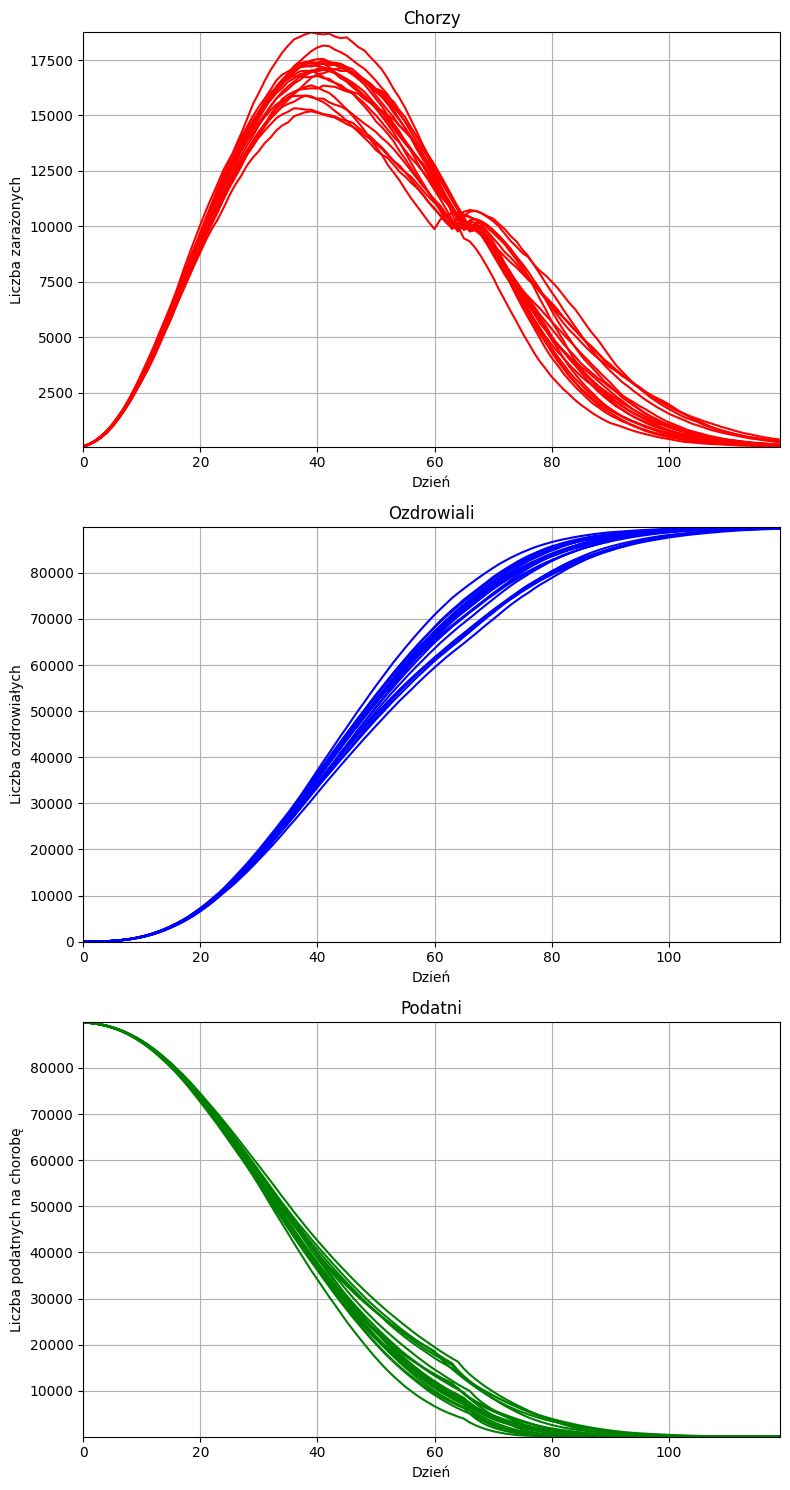

In [91]:
chorzy, ozdrowiali, podatni = parse_files('./e5_b/chorzy_kazdego_dnia.txt', './e5_b/ozdrowiali_kazdego_dnia.txt', './e5_b/podatni_kazdego_dnia.txt')
plot_results(chorzy, ozdrowiali, podatni)

Możemy zauważyć, że nastepuje wówczas niewielki wzrost zachorowań, a następnie przez kilka sni utrzymuje się ich podobny zwiększony poziom, który póżniej dalej spada. Liczba osób podatnych na zachorowanie zmienia nieco tendencję. Nie jest już gładką linią - mamy większy spadek. Oczywiście jest to spowodowane tym, że nowo zarażone osoby nie są już osobami podatnymi. Nie doszło tu jednak do 'drugiej fali' zachorowań, gdyż w chwili zwiększenia $\beta$, bardzo duzo osób była już odporna na chorobę. Mimo wszystko obserwujemy przez kilka dni istotną zmianę w tendencji zachorowań.

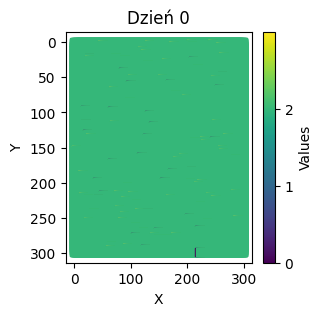

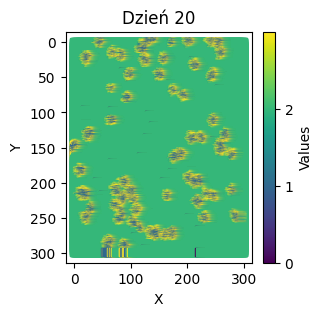

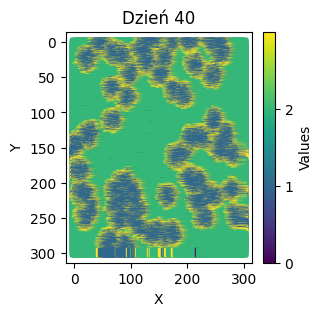

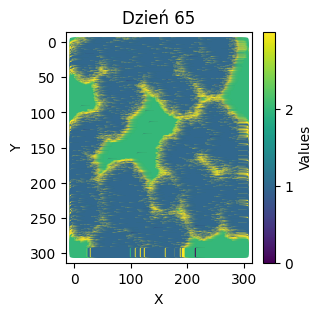

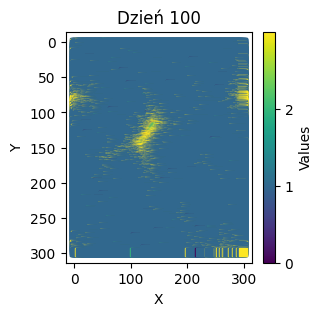

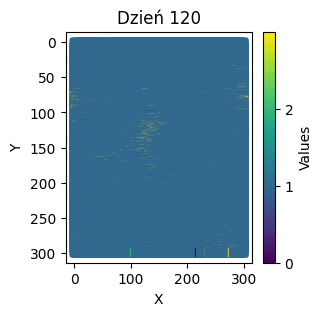

In [97]:
plot_map('./e5_b/mapa1.txt', "Dzień 0")
plot_map('./e5_b/mapa2.txt', "Dzień 20")
plot_map('./e5_b/mapa3.txt', "Dzień 40")
plot_map('./e5_b/mapa4.txt', "Dzień 65")
plot_map('./e5_b/mapa5.txt', "Dzień 100")
plot_map('./e5_b/mapa6.txt', "Dzień 120")